In [1]:
import pandas as pd

# Load the dataset
file_path = 'Amazon Sales data .csv'
amazon_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
amazon_data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [2]:
# Convert 'Order Date' to datetime and extract year and month
amazon_data['Order Date'] = pd.to_datetime(amazon_data['Order Date'], format='%m/%d/%Y')

# Extract year and month for further analysis
amazon_data['Year'] = amazon_data['Order Date'].dt.year
amazon_data['Month'] = amazon_data['Order Date'].dt.month

# Display the updated dataframe to check the new columns
amazon_data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [3]:
# Aggregate total revenue by month (ignoring the year)
monthly_sales = amazon_data.groupby('Month')['Total Revenue'].sum().reset_index()

# Aggregate total revenue by year
yearly_sales = amazon_data.groupby('Year')['Total Revenue'].sum().reset_index()

# Aggregate total revenue by year and month
yearly_monthly_sales = amazon_data.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

monthly_sales, yearly_sales, yearly_monthly_sales.head()


(    Month  Total Revenue
 0       1    10482467.12
 1       2    24740517.77
 2       3     2274823.87
 3       4    16187186.33
 4       5    13215739.99
 5       6     5230325.77
 6       7    15669518.50
 7       8     1128164.91
 8       9     5314762.56
 9      10    15287576.61
 10     11    20568222.76
 11     12     7249462.12,
    Year  Total Revenue
 0  2010    19186024.92
 1  2011    11129166.07
 2  2012    31898644.52
 3  2013    20330448.66
 4  2014    16630214.43
 5  2015    12427982.86
 6  2016    12372867.22
 7  2017    13373419.63,
    Year  Month  Total Revenue
 0  2010      2     3410661.12
 1  2010      5     2587973.26
 2  2010      6     1082418.40
 3  2010     10     6064933.75
 4  2010     11     3458252.00)

<ipython-input-4-26954b09c77c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total Revenue', data=monthly_sales, palette='viridis')


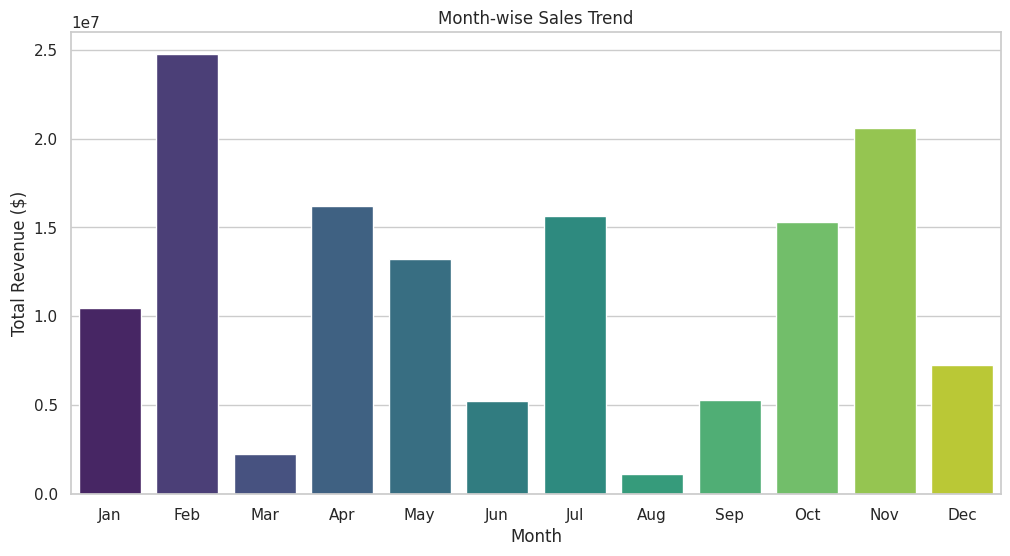

In [4]:
#Month wise trends
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Month-wise Sales Trend
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Revenue', data=monthly_sales, palette='viridis')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


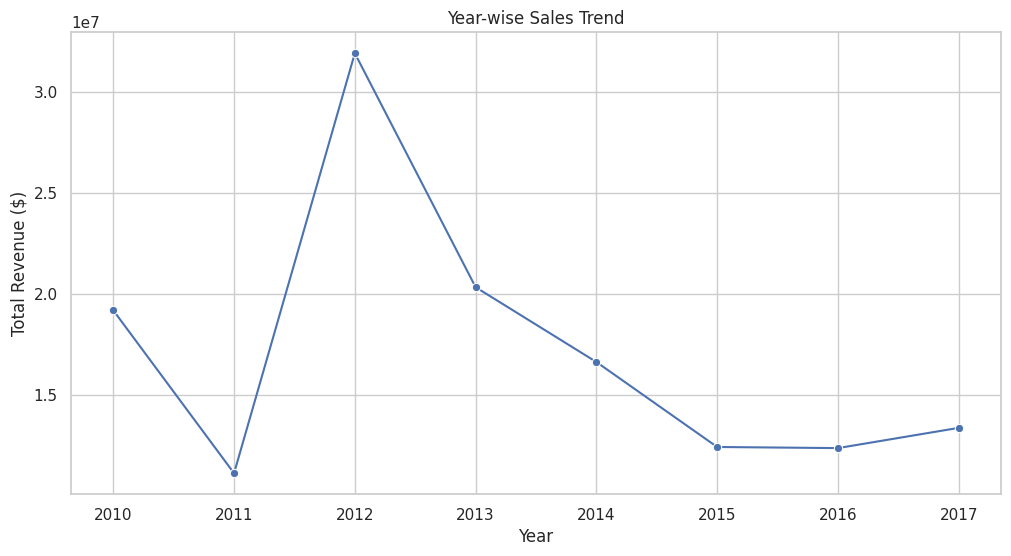

In [5]:
#Year wise Trends
# Year-wise Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Revenue', data=yearly_sales, marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


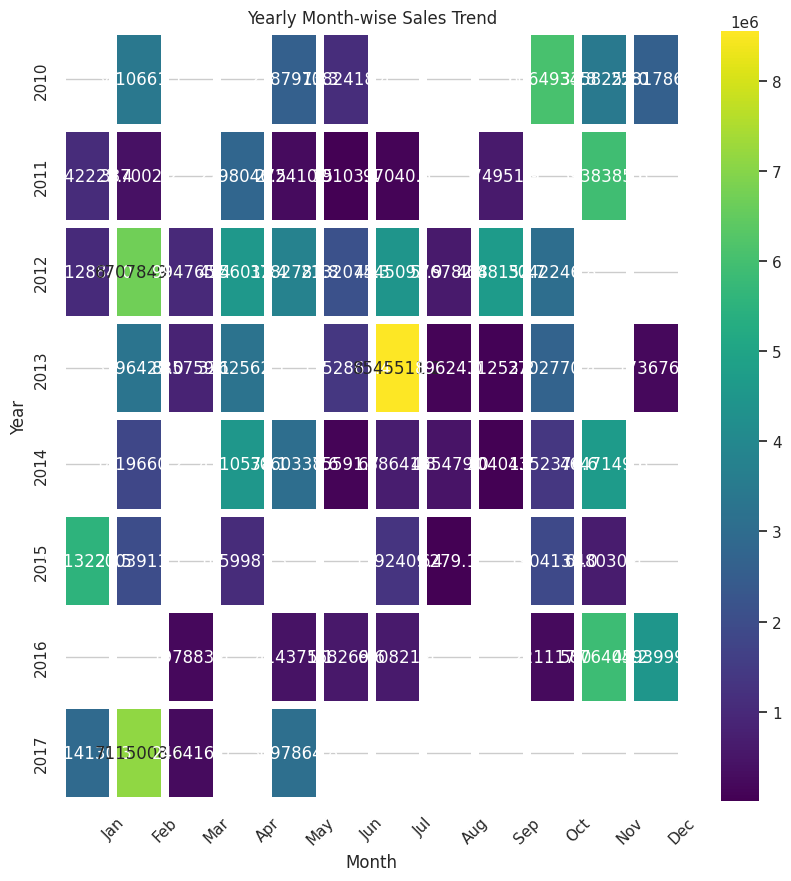

In [6]:
#Yearly Month-wise Sales Trend
# Pivot the data for heatmap
yearly_monthly_sales_pivot = yearly_monthly_sales.pivot(index='Year', columns='Month', values='Total Revenue')

# Yearly Month-wise Sales Trend
plt.figure(figsize=(10, 10))
sns.heatmap(yearly_monthly_sales_pivot, cmap='viridis', annot=True, fmt=".1f", linewidths=5.5)
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [7]:
#1. Data Exploration


summary_stats = amazon_data.describe()

missing_values = amazon_data.isnull().sum()

summary_stats, missing_values


(                Order Date      Order ID   Units Sold  Unit Price   Unit Cost  \
 count                  100  1.000000e+02   100.000000  100.000000  100.000000   
 mean   2013-09-16 14:09:36  5.550204e+08  5128.710000  276.761300  191.048000   
 min    2010-02-02 00:00:00  1.146066e+08   124.000000    9.330000    6.920000   
 25%    2012-02-14 12:00:00  3.389225e+08  2836.250000   81.730000   35.840000   
 50%    2013-07-12 12:00:00  5.577086e+08  5382.500000  179.880000  107.275000   
 75%    2015-04-07 00:00:00  7.907551e+08  7369.000000  437.200000  263.330000   
 max    2017-05-22 00:00:00  9.940222e+08  9925.000000  668.270000  524.960000   
 std                    NaN  2.606153e+08  2794.484562  235.592241  188.208181   
 
        Total Revenue    Total Cost  Total Profit         Year       Month  
 count   1.000000e+02  1.000000e+02  1.000000e+02   100.000000  100.000000  
 mean    1.373488e+06  9.318057e+05  4.416820e+05  2013.230000    6.260000  
 min     4.870260e+03  3.6122

In [8]:
"""2. Key Metrics Identification


Total Revenue
Total Cost
Total Profit
Units Sold"""

total_revenue = amazon_data['Total Revenue'].sum()
total_cost = amazon_data['Total Cost'].sum()
total_profit = amazon_data['Total Profit'].sum()
total_units_sold = amazon_data['Units Sold'].sum()

total_revenue, total_cost, total_profit, total_units_sold


(137348768.31, 93180569.91000001, 44168198.39999999, 512871)

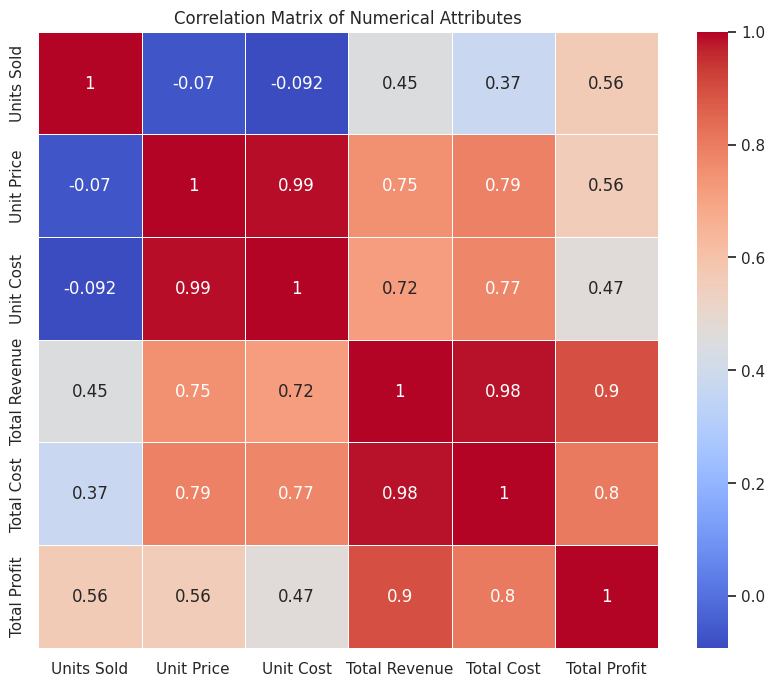

In [9]:
"""3. Correlation Analysis
 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'
"""
correlation_matrix = amazon_data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

<ipython-input-10-672b214cc9f1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Revenue', data=region_analysis, palette='viridis')


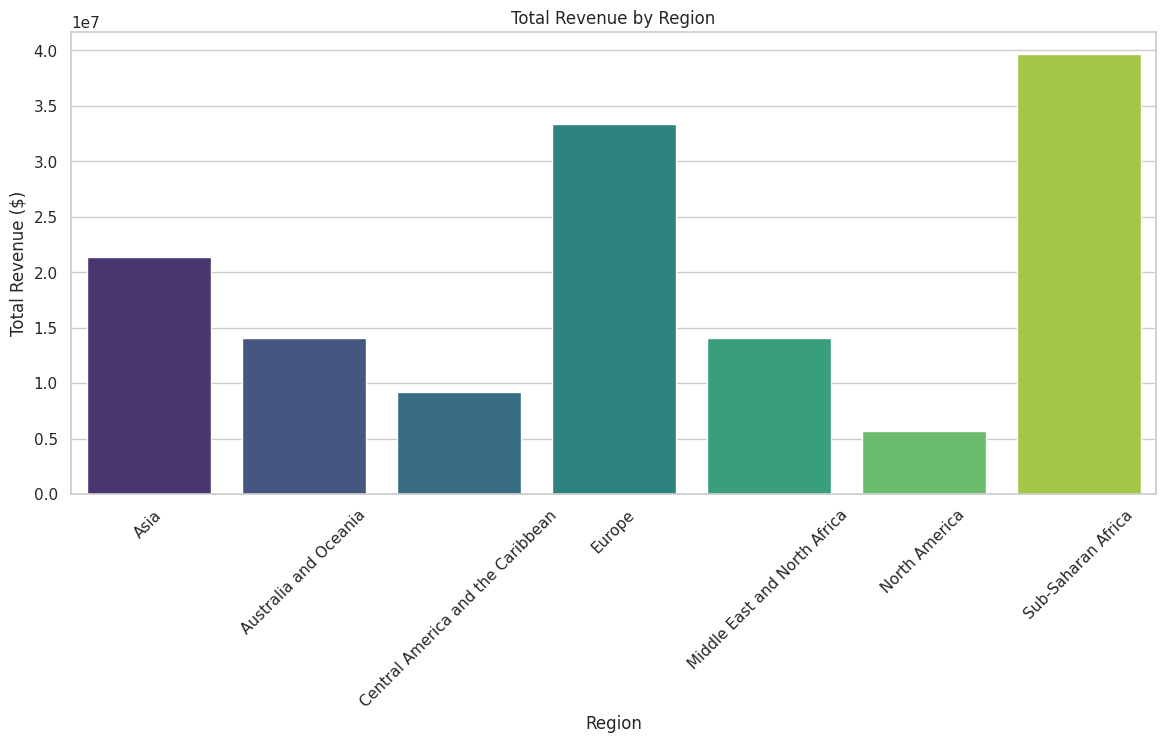

In [10]:
"""4. Categorical Analysis
4.1 Region-wise Analysis"""
region_analysis = amazon_data.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()


plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Total Revenue', data=region_analysis, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()




<ipython-input-11-91f0be83354b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Total Revenue', data=item_type_analysis, palette='viridis')


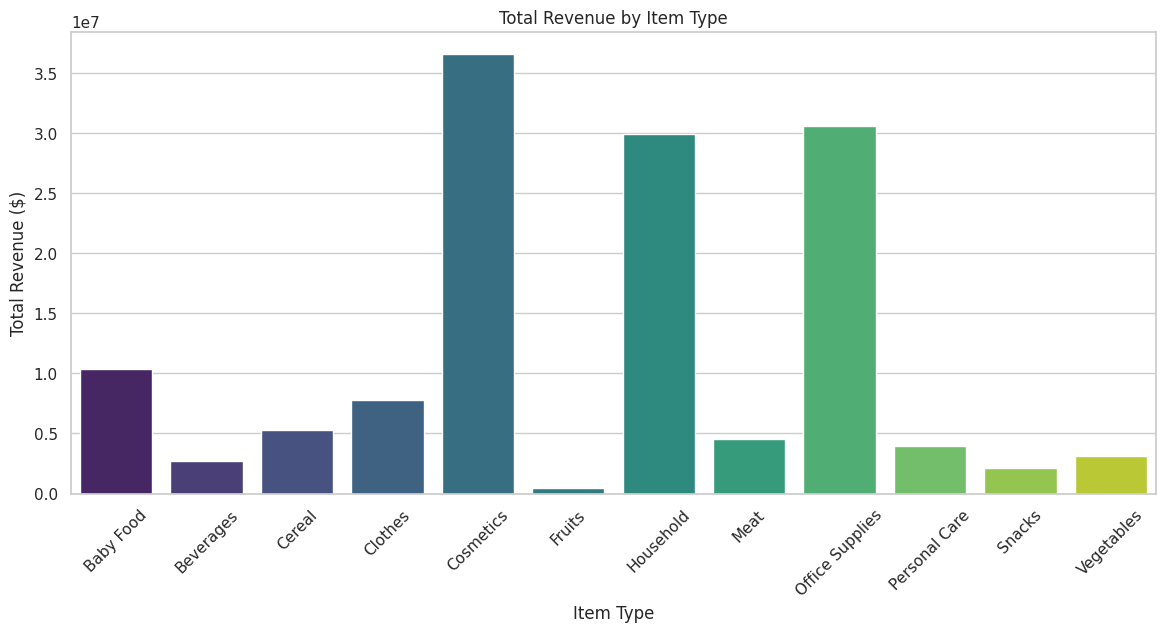

In [11]:
#4.2 Item Type Analysis

# Aggregate key metrics by item type
item_type_analysis = amazon_data.groupby('Item Type')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plot item type analysis
plt.figure(figsize=(14, 6))
sns.barplot(x='Item Type', y='Total Revenue', data=item_type_analysis, palette='viridis')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()




<ipython-input-12-645b71b5dd16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Channel', y='Total Revenue', data=sales_channel_analysis, palette='viridis')


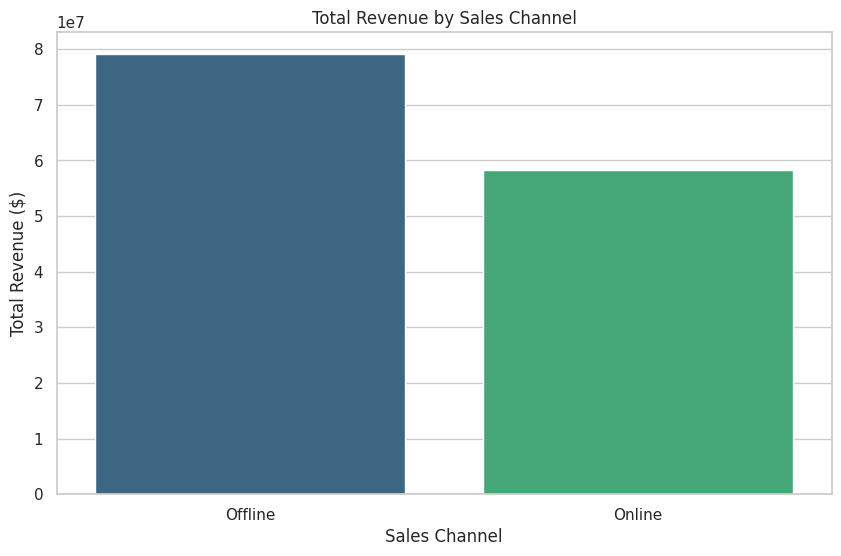

<ipython-input-12-645b71b5dd16>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Channel', y='Total Cost', data=sales_channel_analysis, palette='viridis')


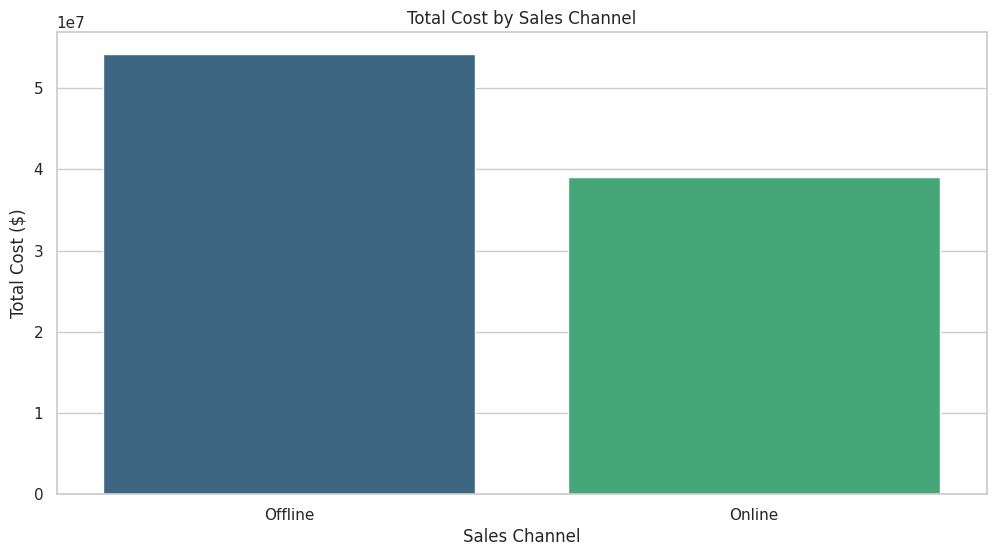

In [12]:
# Sales Channel Analysis
sales_channel_analysis = amazon_data.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plot sales channel analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Total Revenue', data=sales_channel_analysis, palette='viridis')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue ($)')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns


sales_channel_analysis = amazon_data.groupby('Sales Channel')[['Total Cost', 'Total Profit']].sum().reset_index()

# Plot Total Cost by Sales Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Channel', y='Total Cost', data=sales_channel_analysis, palette='viridis')
plt.title('Total Cost by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Cost ($)')
plt.show()




<ipython-input-13-21d5b41c2647>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Total Revenue', data=order_priority_analysis, palette='viridis')


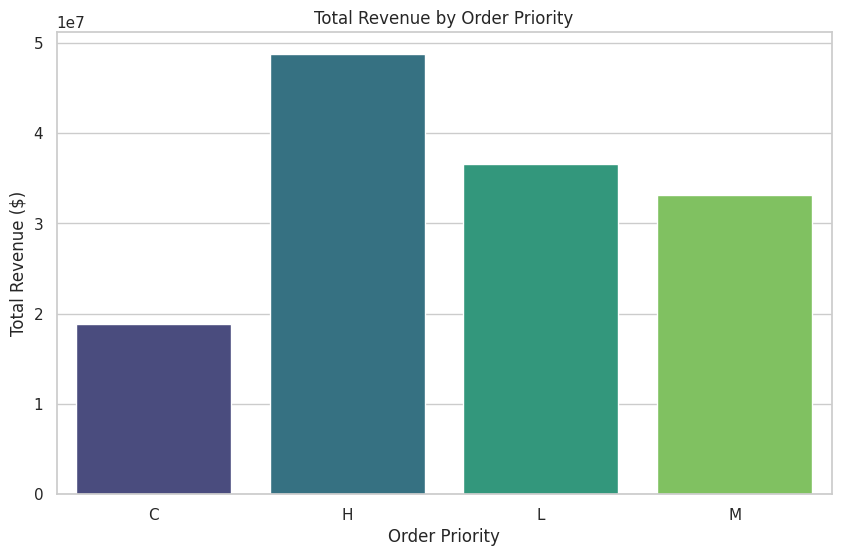

In [13]:
# Order Priority Analysis

order_priority_analysis = amazon_data.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plot order priority analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Total Revenue', data=order_priority_analysis, palette='viridis')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue ($)')
plt.show()




<ipython-input-14-8e622bfc4a84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Total Cost', data=order_priority_analysis, palette='viridis')


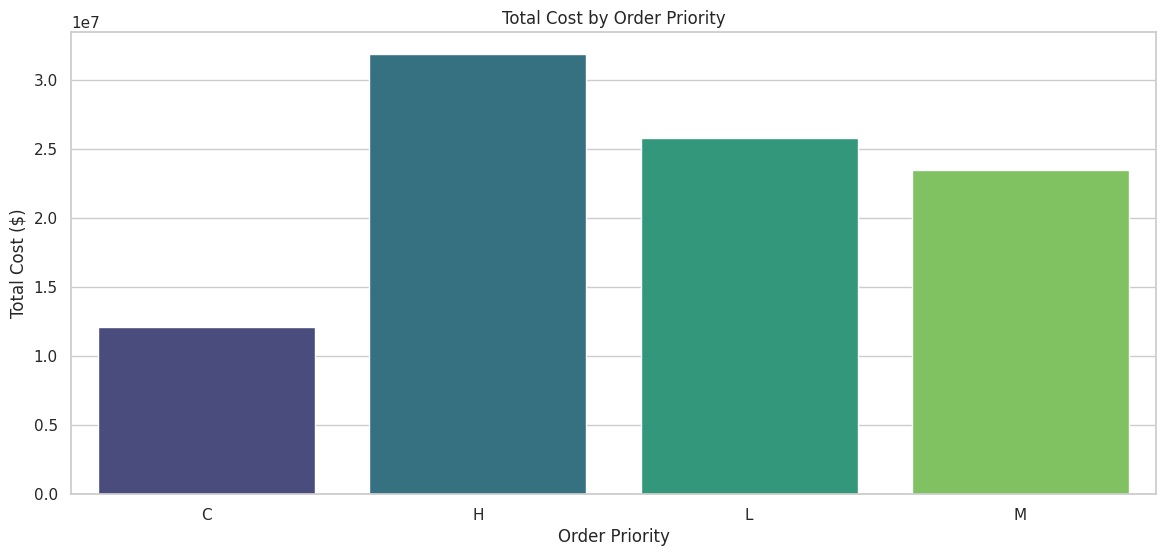

In [14]:
# Cost and Total Profit by Order Priority



order_priority_analysis = amazon_data.groupby('Order Priority')[['Total Cost', 'Total Profit']].sum().reset_index()

# Plot Total Cost by Order Priority
plt.figure(figsize=(14, 6))
sns.barplot(x='Order Priority', y='Total Cost', data=order_priority_analysis, palette='viridis')
plt.title('Total Cost by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Cost ($)')
plt.show()




<ipython-input-15-e1f8903bc28f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total Revenue', data=top_countries, palette='viridis')


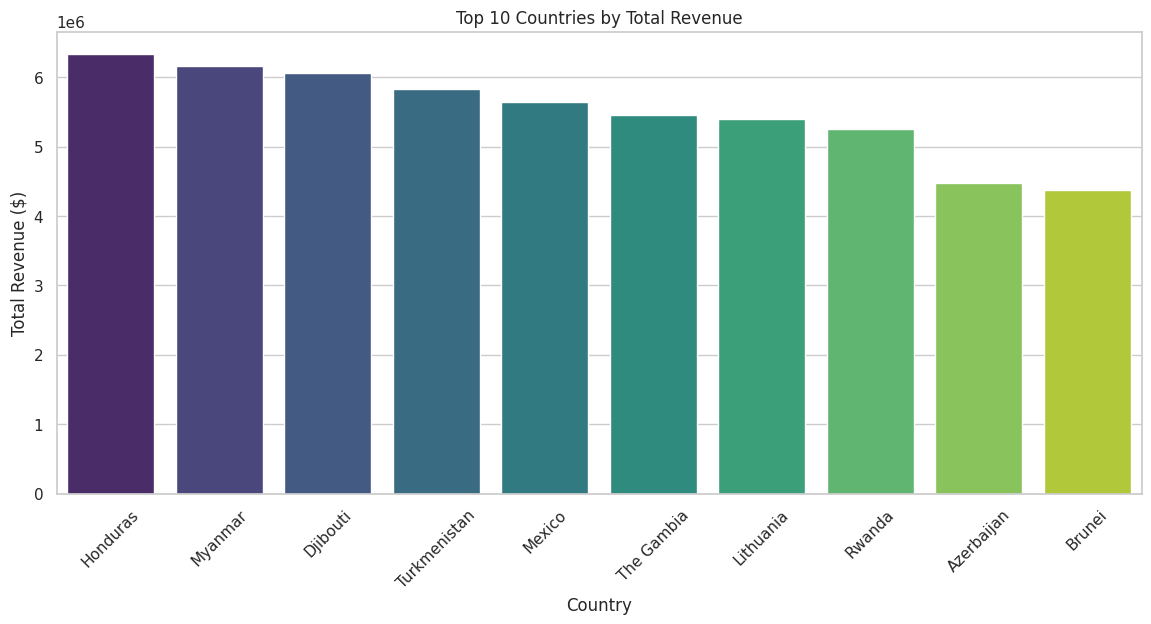

In [15]:
#Geographical Analysis
country_analysis = amazon_data.groupby('Country')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Sort by Total Revenue for better visualization
top_countries = country_analysis.sort_values(by='Total Revenue', ascending=False).head(10)

# Plot top countries by total revenue
plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Total Revenue', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()
